###  relplot()

In [1]:
'''
Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. 
The kind parameter selects the underlying axes-level function to use:

scatterplot() (with kind="scatter"; the default)
lineplot() (with kind="line")
'''

'\nFigure-level interface for drawing relational plots onto a FacetGrid.\n\nThis function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. \nThe kind parameter selects the underlying axes-level function to use:\n\nscatterplot() (with kind="scatter"; the default)\nlineplot() (with kind="line")\n'

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tips=sns.load_dataset('tips')

Assigning x and y and any semantic mapping variables will draw a single plot:



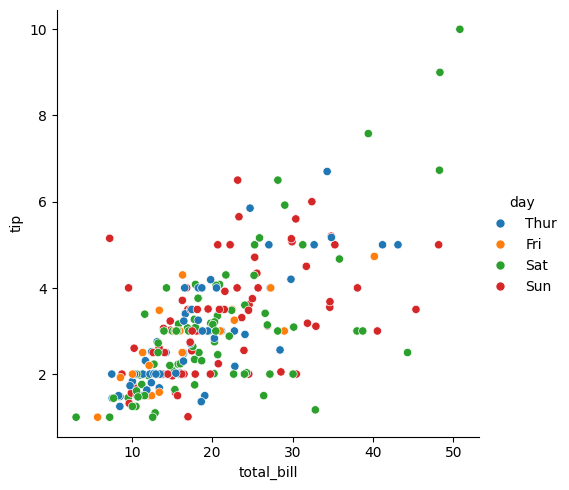

In [5]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='day')

Assigning a col variable creates a faceted figure with multiple subplots arranged across the columns of the grid:


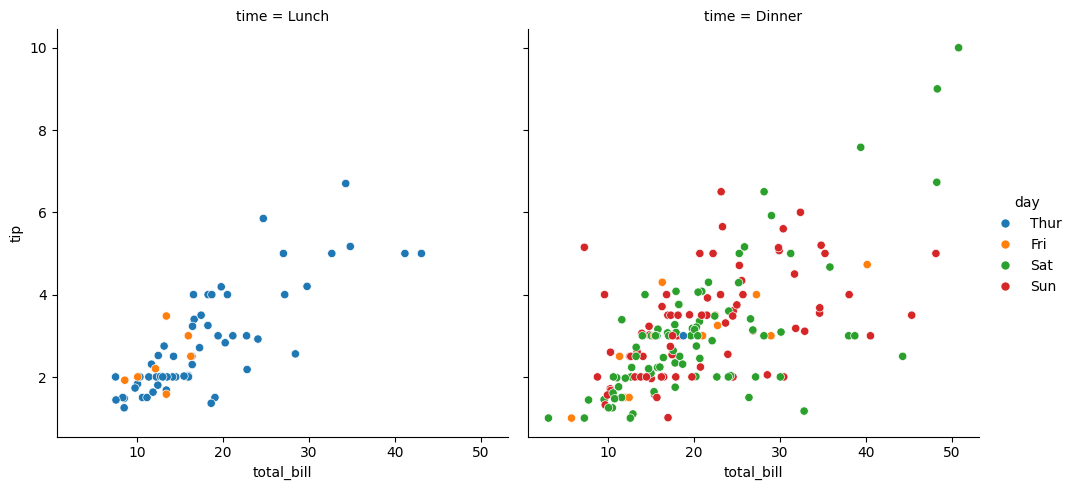

In [6]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='day', col='time')

Different variables can be assigned to facet on both the columns and rows:


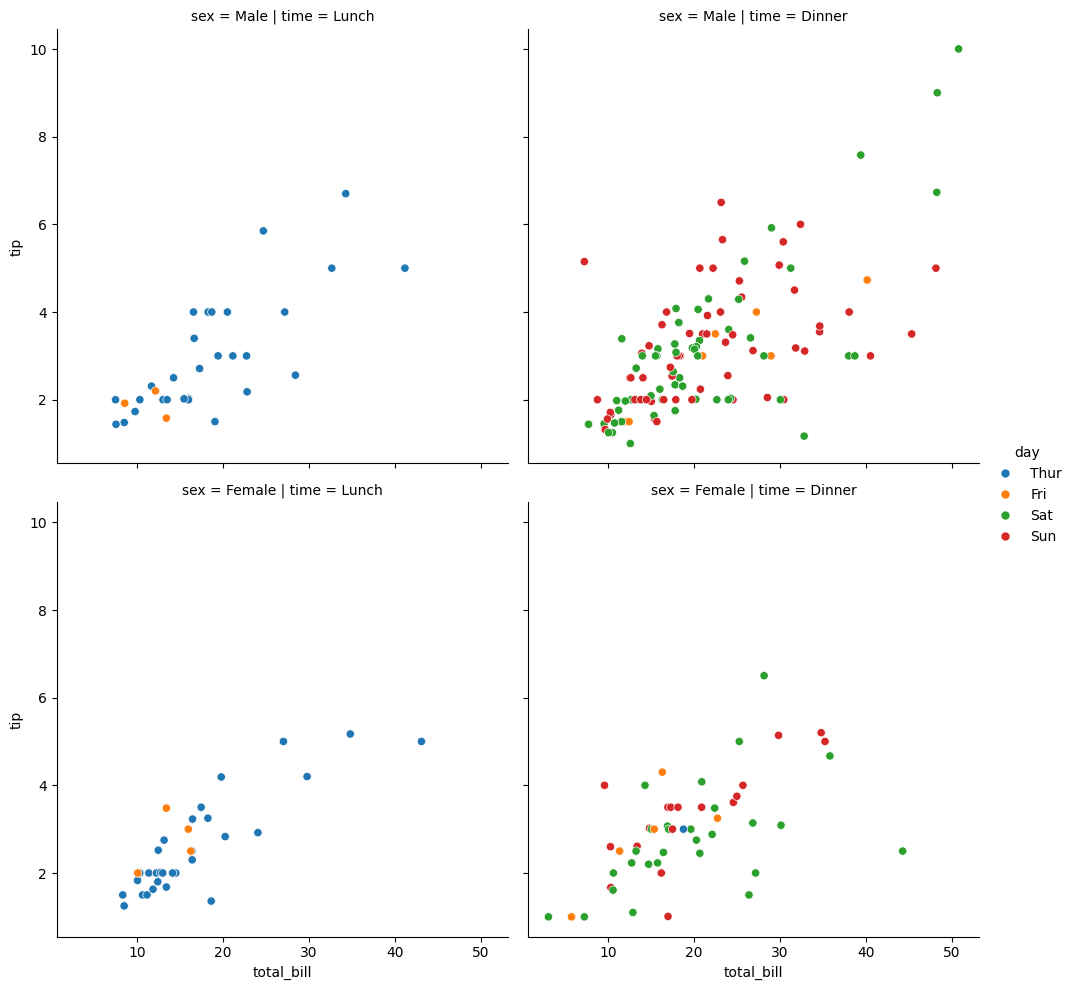

In [7]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='day', col='time', row='sex')

When the variable assigned to col has many levels, it can be “wrapped” across multiple rows:


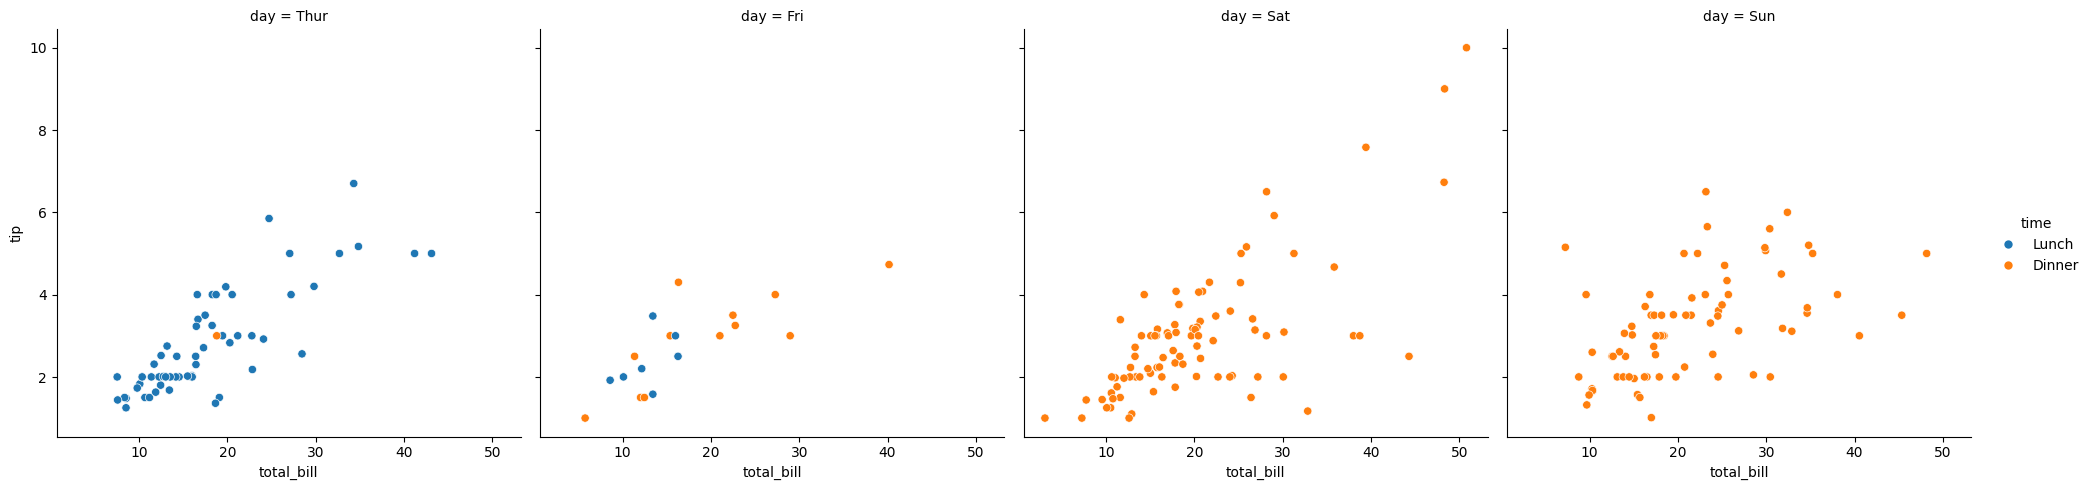

In [8]:
sns.relplot(data=tips,x='total_bill', y='tip', hue='time', col='day')

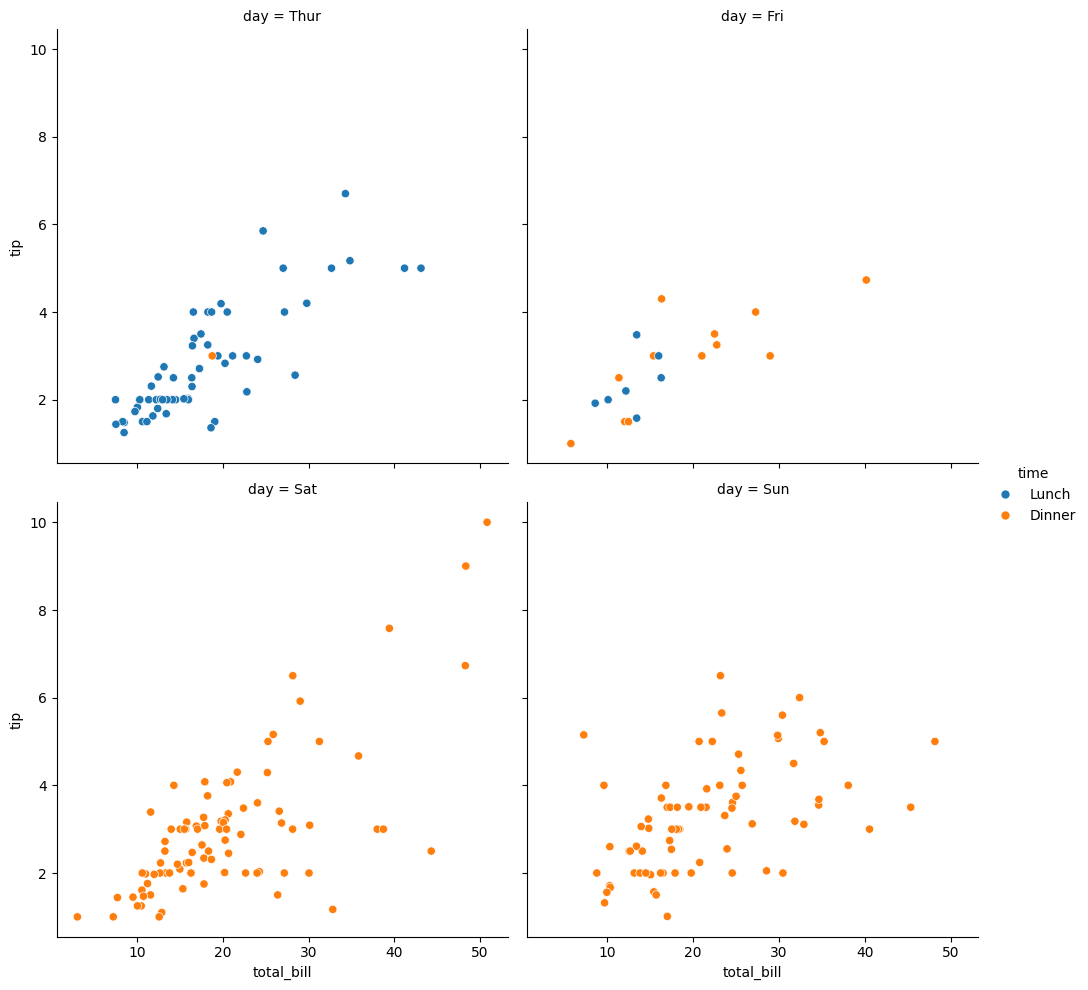

In [9]:
sns.relplot(data=tips,x='total_bill', y='tip', hue='time', col='day', col_wrap=2)

Assigning multiple semantic variables can show multi-dimensional relationships, but be mindful to avoid making an overly-complicated plot.

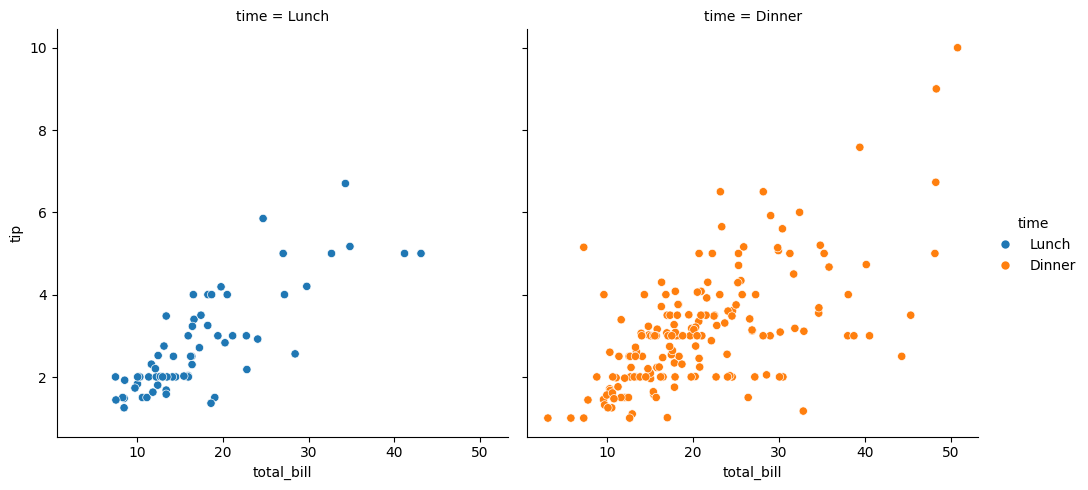

In [11]:
sns.relplot(
    data=tips,x='total_bill', y='tip', hue='time',
    col='time'   
)

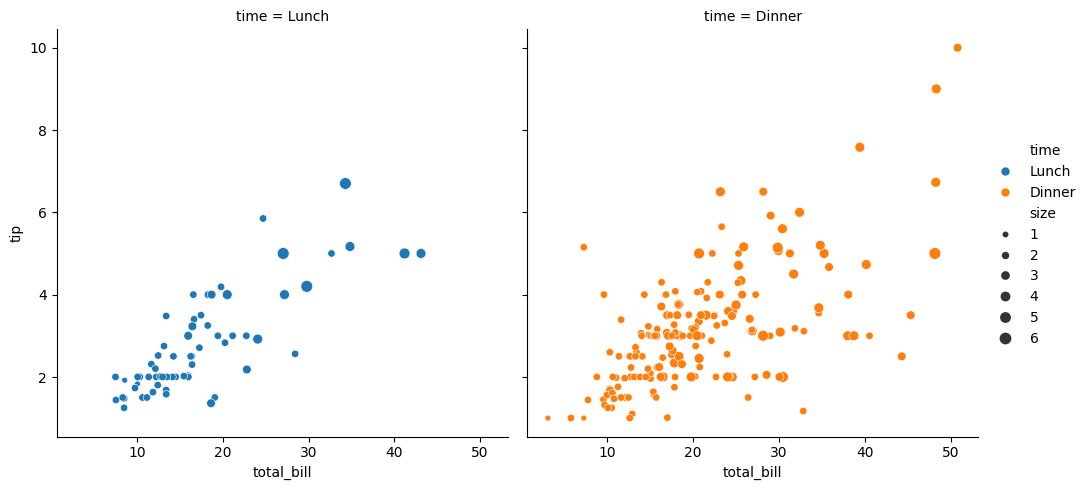

In [12]:
sns.relplot(
    data=tips,x='total_bill', y='tip', hue='time',
    col='time', size='size'   
)

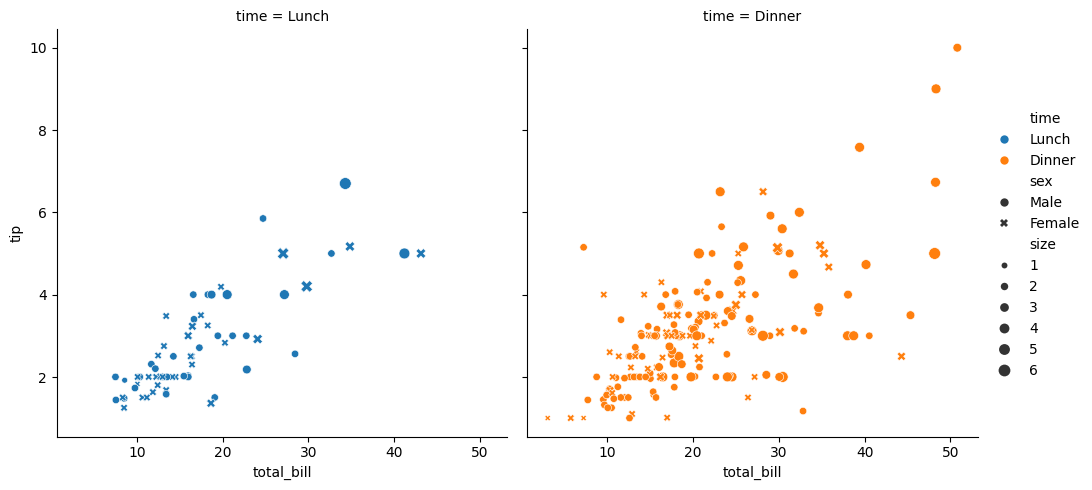

In [13]:
sns.relplot(
    data=tips,x='total_bill', y='tip', hue='time',
    col='time', size='size'  , style='sex' 
)

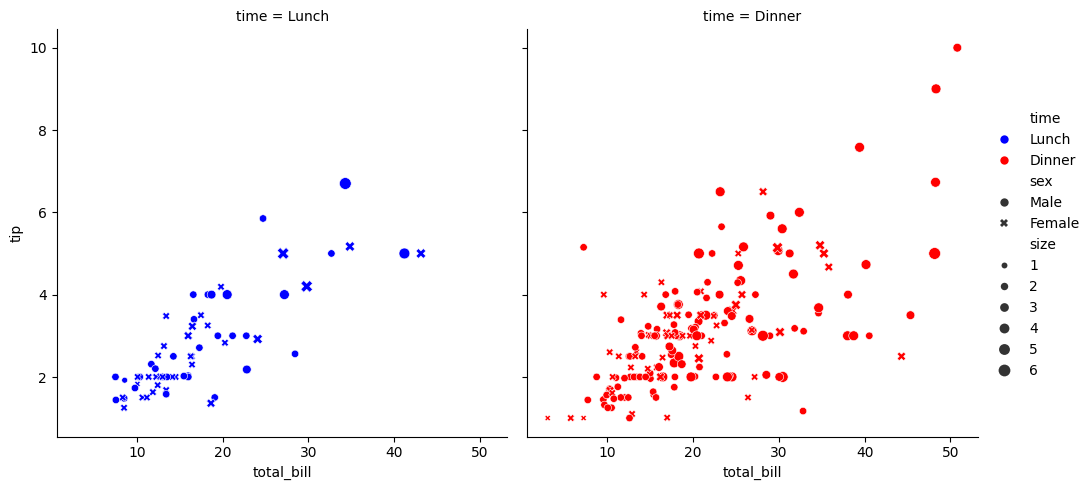

In [14]:
sns.relplot(
    data=tips,x='total_bill', y='tip', hue='time',
    col='time', size='size'  , style='sex',
    palette=['b', 'r']
)

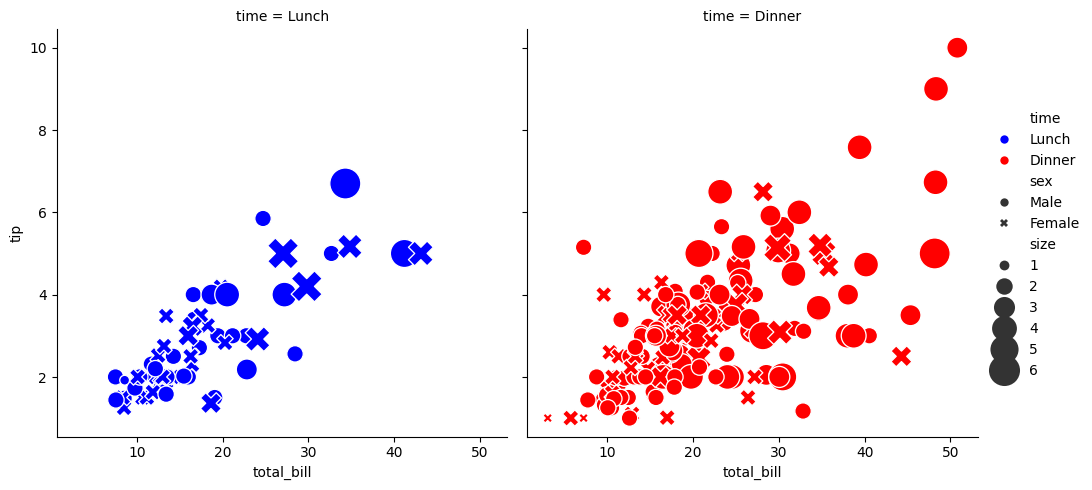

In [22]:
sns.relplot(
    data=tips,x='total_bill', y='tip', hue='time',
    col='time', size='size'  , style='sex',
    palette=['b', 'r'], sizes=(50,500)
)

#### When there is a natural continuity to one of the variables, it makes more sense to show lines instead of points. To draw the figure using lineplot(), set kind="line". We will illustrate this effect with the “fmri dataset:

#### Using kind="line" offers the same flexibility for semantic mappings as kind="scatter", but lineplot() transforms the data more before plotting. Observations are sorted by their x value, and repeated observations are aggregated. By default, the resulting plot shows the mean and 95% CI for each unit

In [24]:
fmri=sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


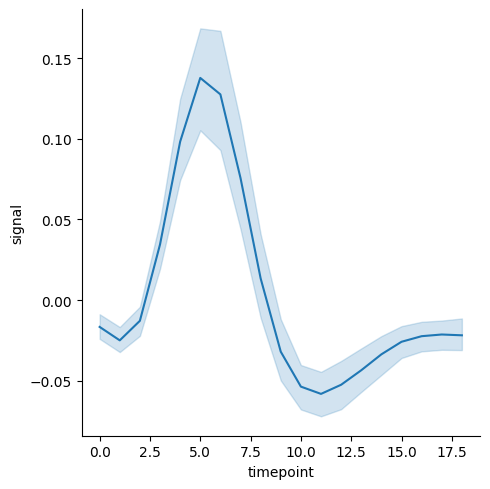

In [26]:
sns.relplot(
        data=fmri, x='timepoint', y='signal',
        kind='line'
)

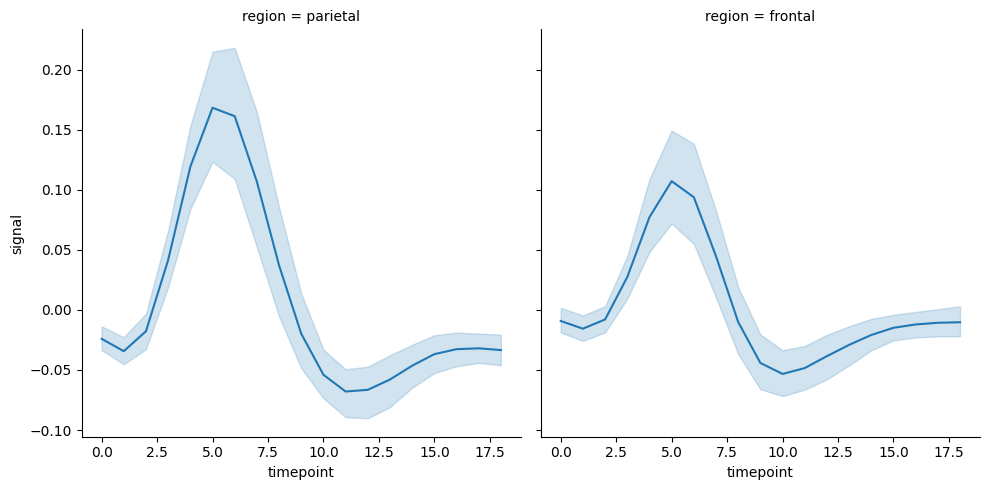

In [28]:
sns.relplot(
        data=fmri, x='timepoint', y='signal',col='region',
        kind='line'
)

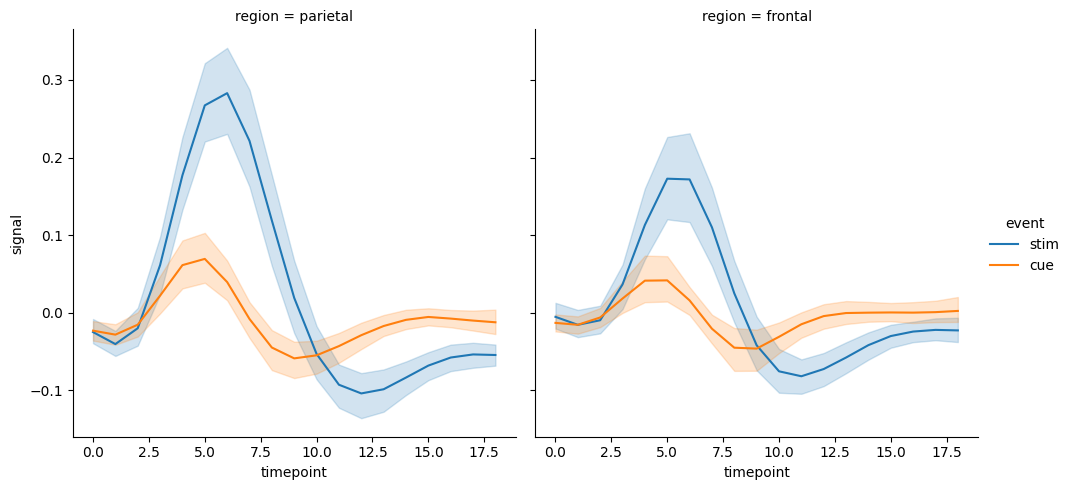

In [29]:
sns.relplot(
        data=fmri, x='timepoint', y='signal',col='region',
        hue='event', kind='line'
)

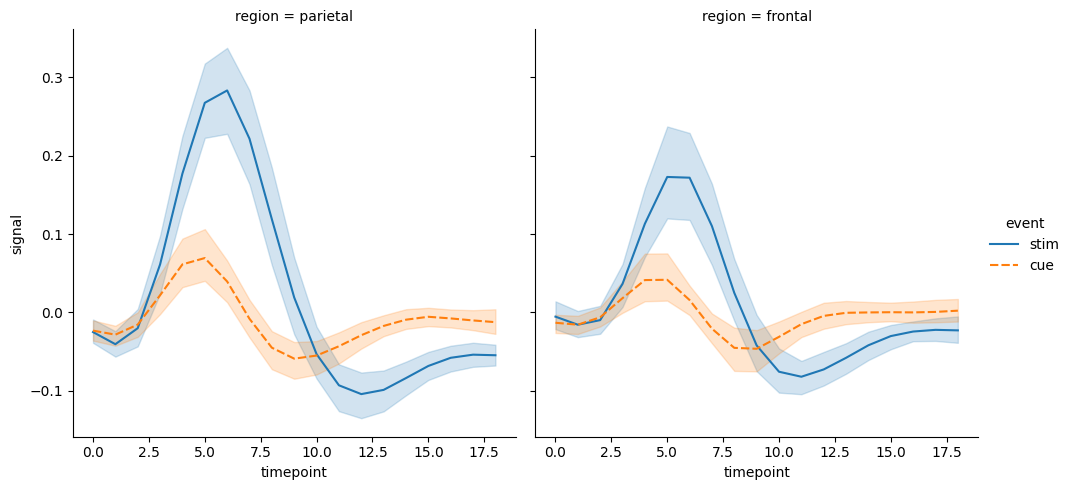

In [31]:
sns.relplot(
        data=fmri, x='timepoint', y='signal',col='region',
        hue='event',style='event' ,kind='line'
)

#### The size and shape of the figure is parametrized by the height and aspect ratio of each individual facet:



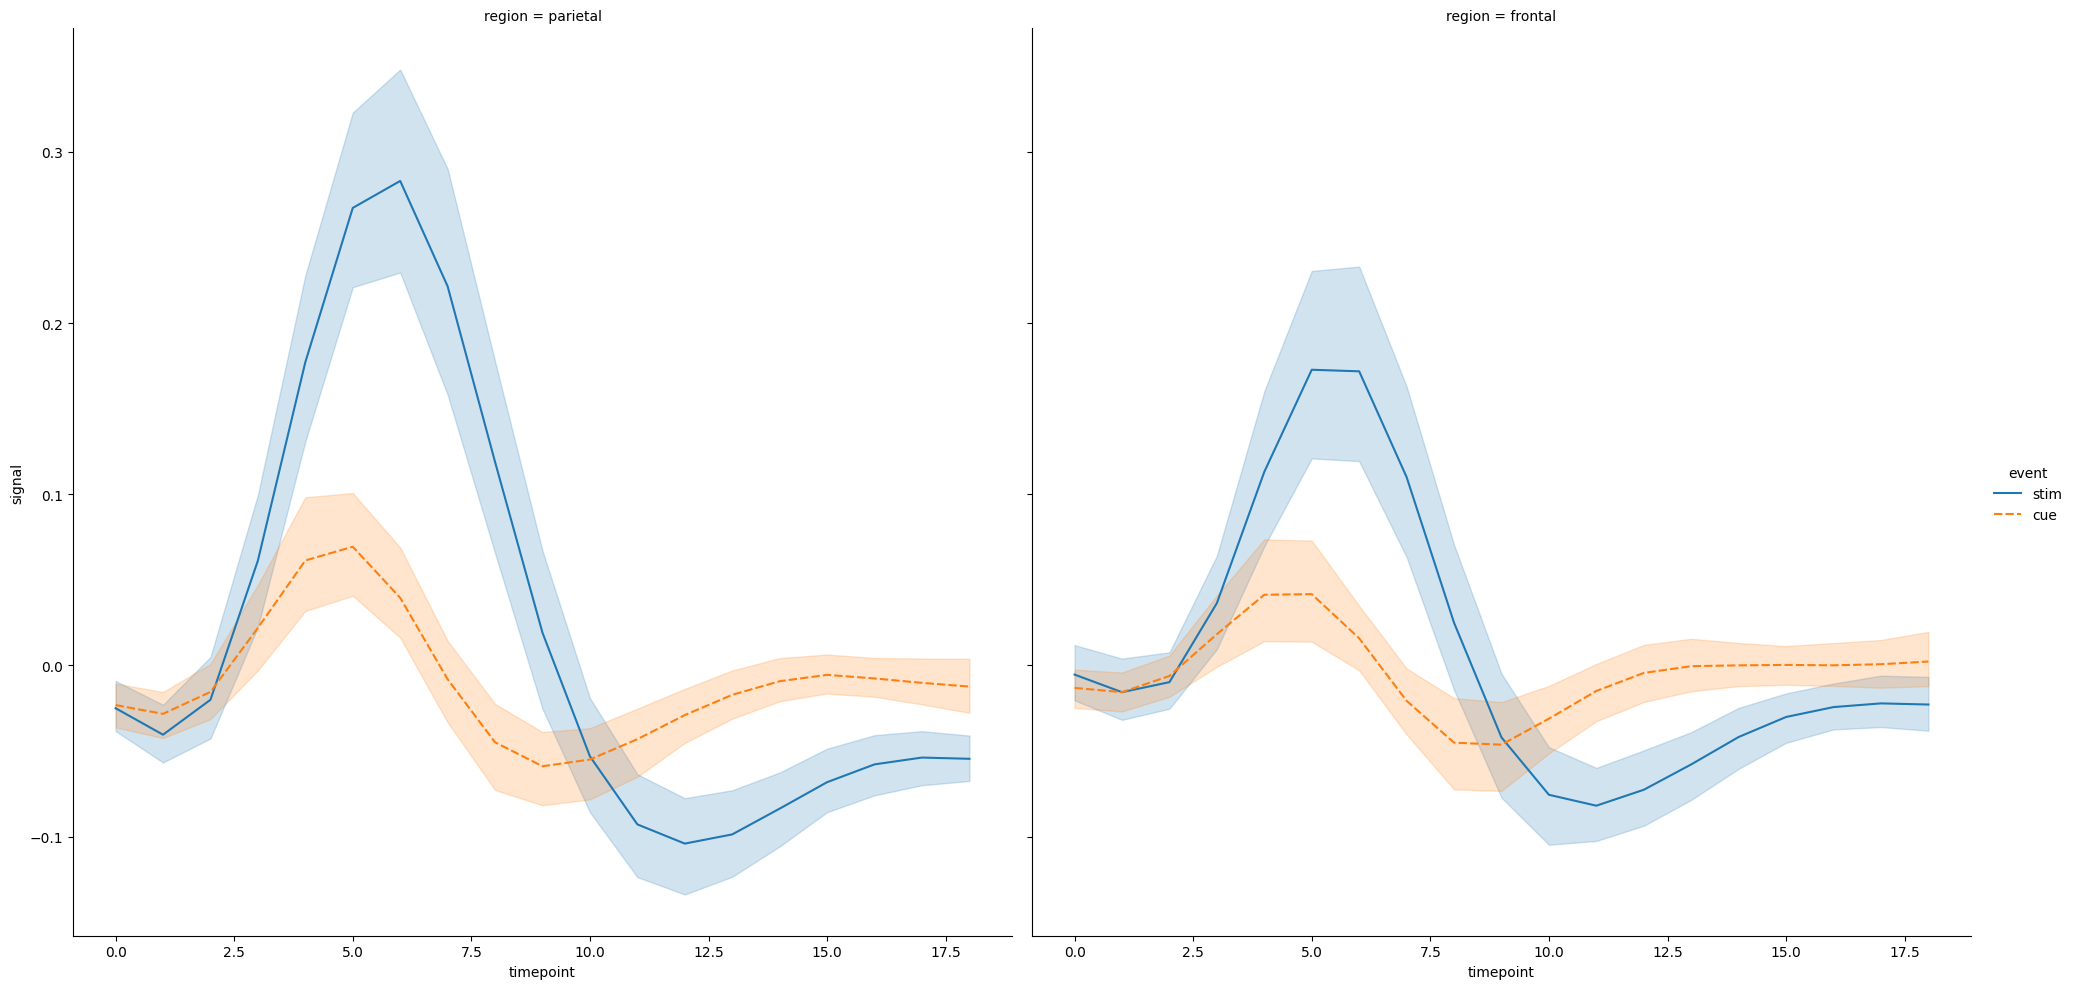

In [35]:
sns.relplot(
        data=fmri, x='timepoint', y='signal',col='region',
        hue='event',style='event' ,
        height=10, kind='line'
)

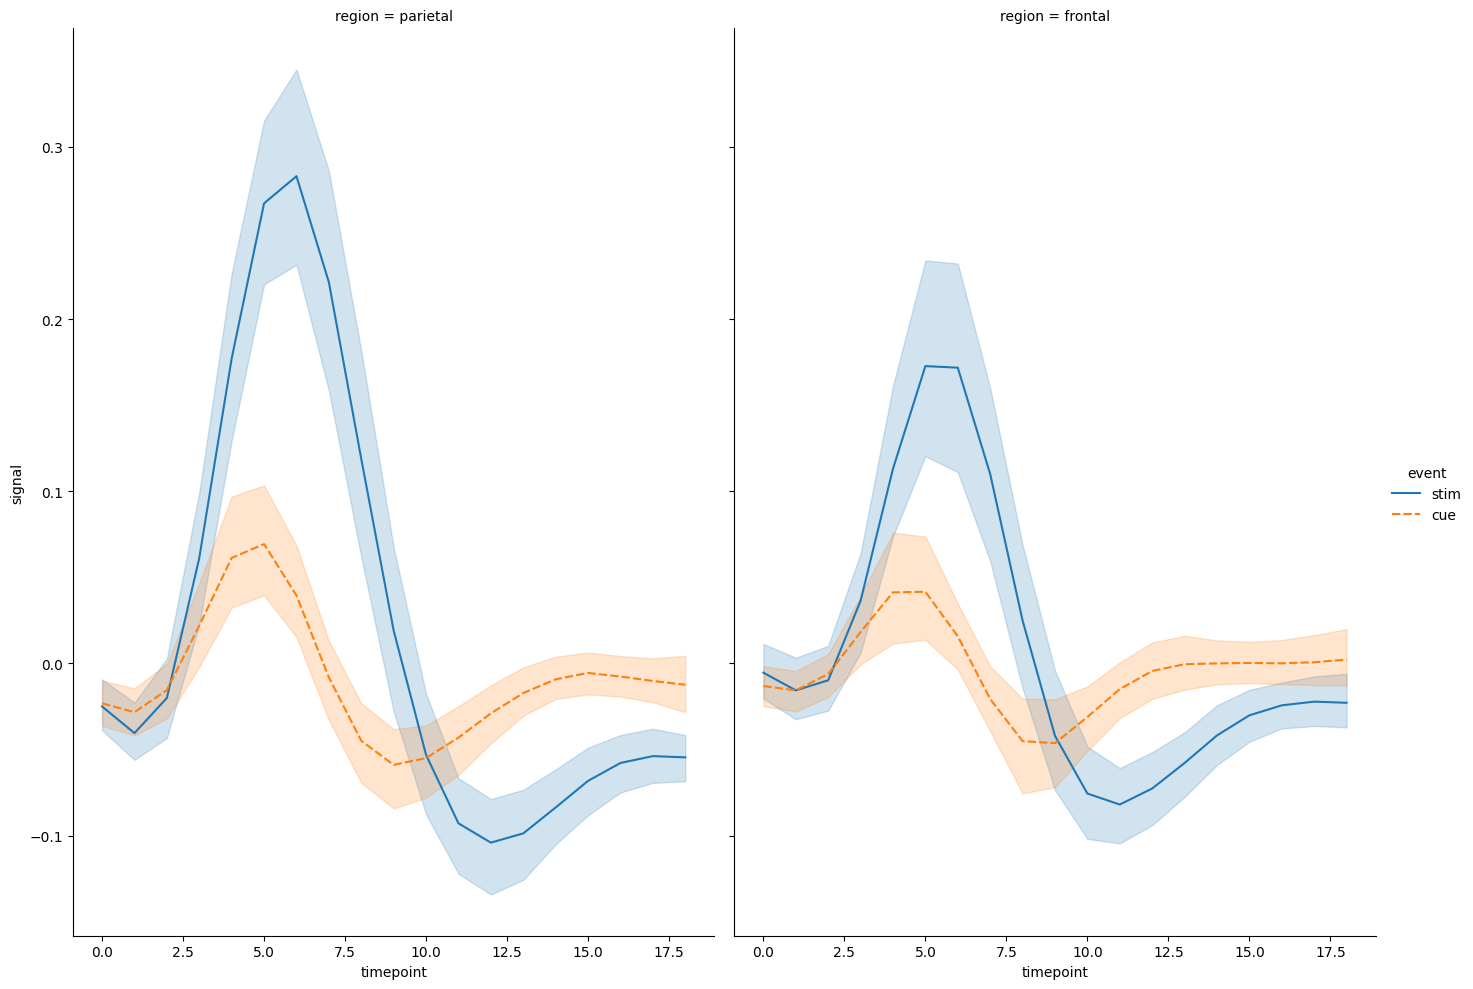

In [36]:
sns.relplot(
        data=fmri, x='timepoint', y='signal',col='region',
        hue='event',style='event' ,
        height=10, aspect=0.7, kind='line'
)

#### The object returned by relplot() is always a FacetGrid, which has several methods that allow you to quickly tweak the title, labels, and other aspects of the plot:

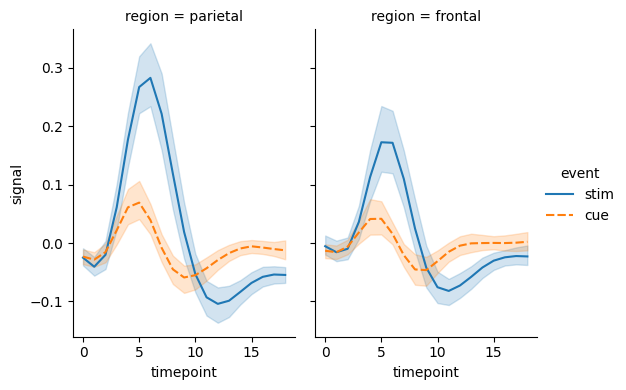

In [37]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)

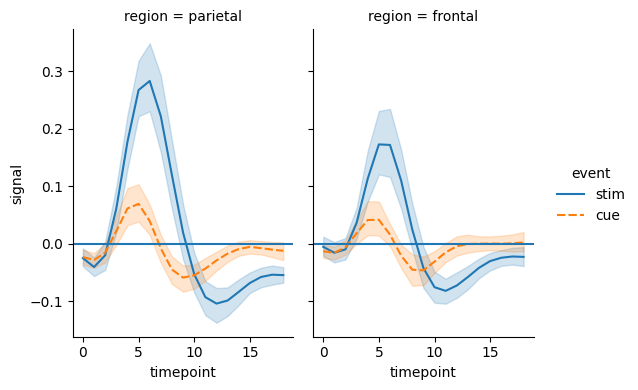

In [46]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
g.map(plt.axhline)  # by default y=0

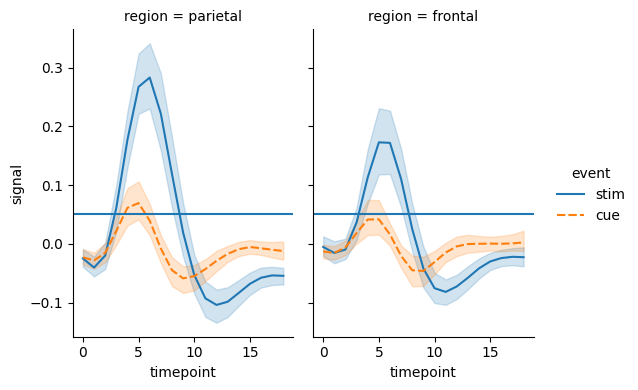

In [52]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
g.map(plt.axhline, y=0.05)

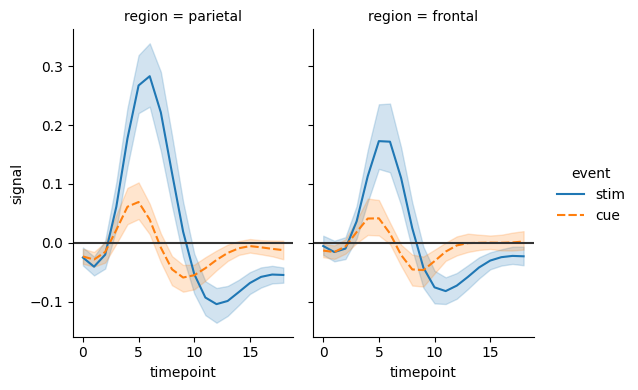

In [57]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
g.map(plt.axhline, y=0, color='0.2')

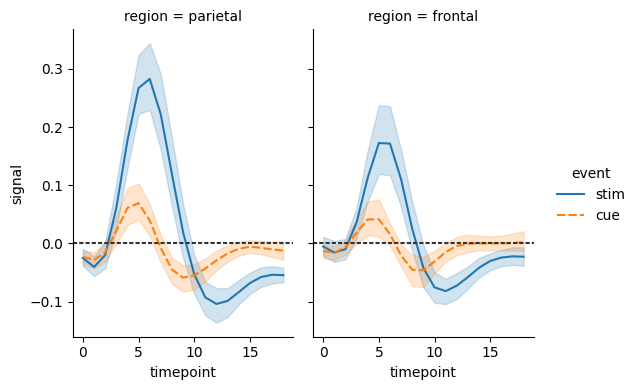

In [58]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
g.map(plt.axhline, y=0, color='0.2', dashes=(2,1))

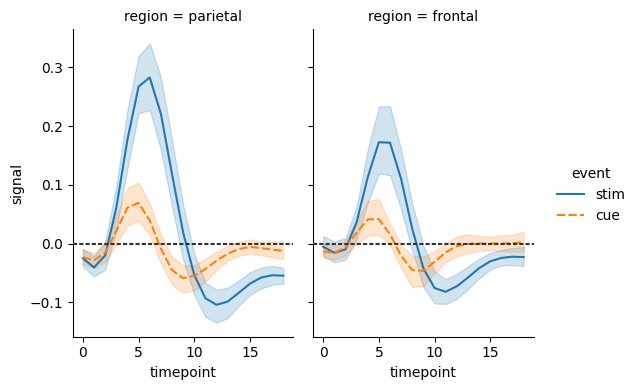

In [62]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
g.map(plt.axhline, y=0, color='0.2', dashes=(2,1), zorder=0)

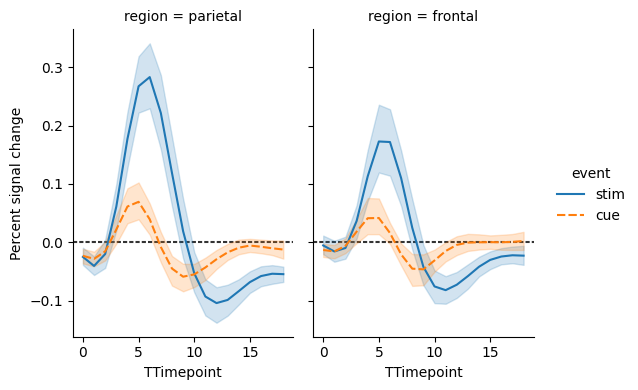

In [63]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
g.map(plt.axhline, y=0, color='0.2', dashes=(2,1), zorder=0)
g.set_axis_labels('TTimepoint', "Percent signal change")

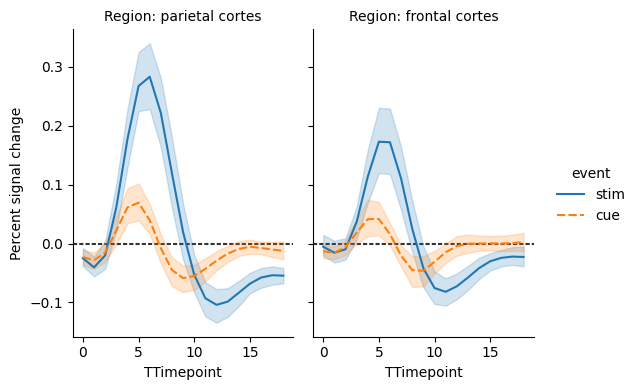

In [64]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
g.map(plt.axhline, y=0, color='0.2', dashes=(2,1), zorder=0)
g.set_axis_labels('TTimepoint', "Percent signal change")
g.set_titles('Region: {col_name} cortes')

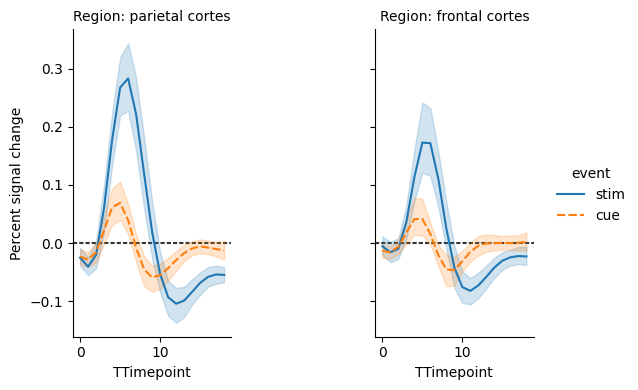

In [71]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
g.map(plt.axhline, y=0, color='0.2', dashes=(2,1), zorder=0)
g.set_axis_labels('TTimepoint', "Percent signal change")
g.set_titles('Region: {col_name} cortes')
g.tight_layout(w_pad=10)

### It is also possible to use wide-form data with relplot():



In [72]:
sns.load_dataset('flights')

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [74]:
sns.load_dataset('flights').pivot(index='year', columns='month', values='passengers')

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [76]:
flights_wide=sns.load_dataset('flights').pivot(index='year', columns='month', values='passengers')

In [77]:
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


#### Faceting is not an option in this case, but the plot will still take advantage of the external legend offered by FacetGrid:

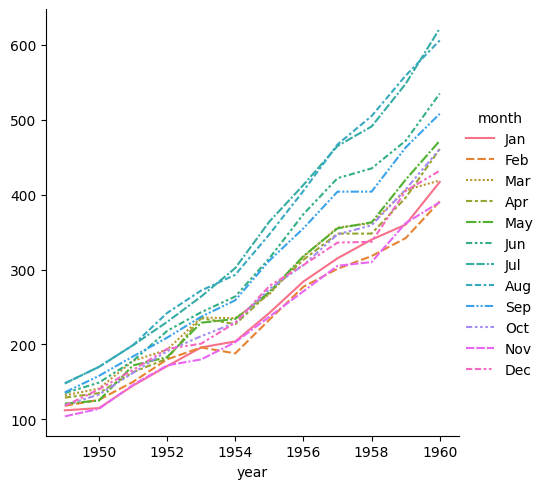

In [79]:
sns.relplot(data=flights_wide, kind='line')